<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Визначення ознак


In [13]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [20]:
def resize(data):
    resized = []
    for x in data:
        x = Image.fromarray(x)
        x = x.resize((32, 32))
        x = np.array(x)
        resized.append(x)
    resized = np.array(resized)
    resized = np.repeat(resized[..., np.newaxis], 3, -1)

    return resized

In [21]:
x_train = resize(x_train)
x_test = resize(x_test)

x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)

In [22]:
base_model.trainable = False

In [31]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data = (x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc}")

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6628 - loss: 3.0500 - val_accuracy: 0.8153 - val_loss: 0.5143
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7905 - loss: 0.5876 - val_accuracy: 0.8270 - val_loss: 0.4822
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8086 - loss: 0.5303 - val_accuracy: 0.8399 - val_loss: 0.4498
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8199 - loss: 0.4898 - val_accuracy: 0.8428 - val_loss: 0.4406
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8271 - loss: 0.4738 - val_accuracy: 0.8523 - val_loss: 0.4252
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8343 - loss: 0.4479 - val_accuracy: 0.8513 - val_loss: 0.4352
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8329 - loss: 0.4524 - val_accuracy: 0.8542 - val_loss: 0.4200
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8375 - loss: 0.4445 - 

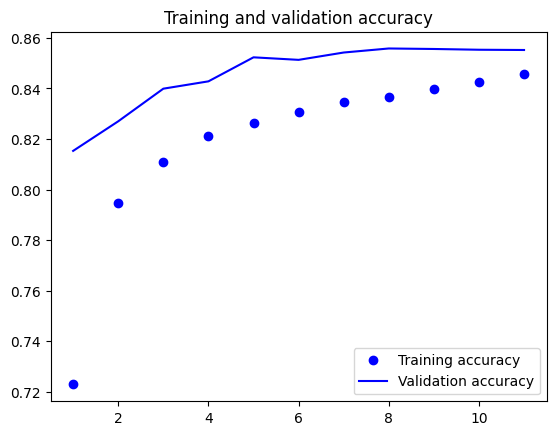

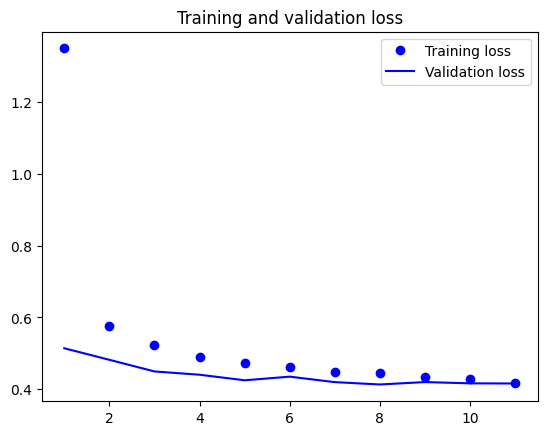

In [32]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Дотренування


In [36]:
# for layer in base_model.layers[-4:]:
#     layer.trainable = True
base_model.trainable = True

In [37]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc}")

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.1019 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0998 - loss: 2.3027
Точність на тестових даних: 0.10000000149011612


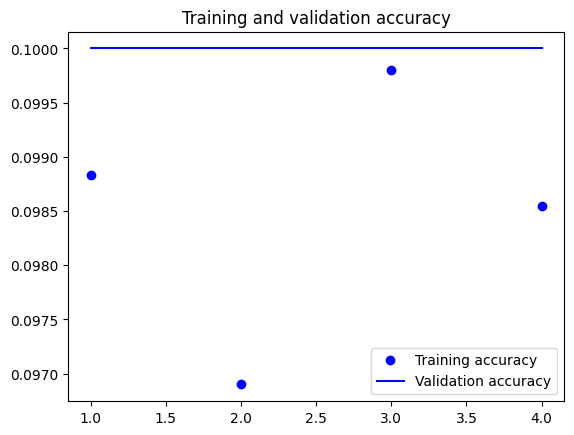

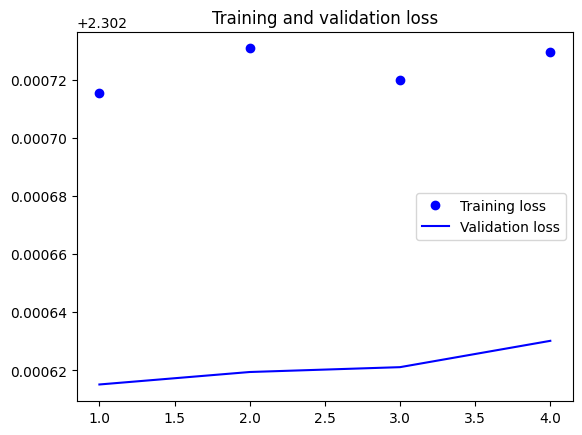

In [38]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Висновок:**

Використовуючи прийом виділення ознак базова модель vgg16 показала гірші результати точності ніж згорткова мережа - 0.85 проти 0.91.
Прийом донавчання виявився не ефективним, як з донавчанням 4 останніх шарів, так і всіх шарів моделі.